# Lineare Regression
## 3.1 Lineare Regression im Eindimensionalen Raum $f:R→R$
Bei der linearen Regression im Eindimensionalen nehmen wir an, dass die Funktion f beschrieben werden kann durch:

$ f (x) = w_1 x + w_0$

Wir nennen $w = (w , w )T ∈ R^2$ Parameter des Modells.

Dabei sind die Parameter $w_1$ die Steigungn und $w_0$ die Schnittstelle mit der Y-Achse.

### 3.1.1 Welche Gerade passt am besten in den Datenpunkten -> Bestimmung der Parameter 
Wir bestimmen den quadratischen Fehler (Residual Sum of Squares, RSS) der parametrisierten Funktion mit Hilfe der Formel:

$RSS(w) = \sum_{i=1}^{n}  (y^{(i)} − f_w(x^{(i)})^2$

Bei der RSS werden die Abstände quadriert und summiert.

### Beispiel

Wir untersuchen die Beziehung zwischen der Menge der in einer Kaffeebar verkauften Kaffees und dem Tagesumsatz. Die Daten sind jedoch durch Faktoren wie Wetter und Feiertage leicht gestört, so dass sie nicht perfekt linear sind.
Hier sind die fiktiven Datenpunkte:

- 50 Kaffees, Umsatz: 200 Euro
- 60 Kaffees, Umsatz: 240 Euro
- 70 Kaffees, Umsatz: 280 Euro
- 80 Kaffees, Umsatz: 260 Euro
- 90 Kaffees, Umsatz: 300 Euro
- 100 Kaffees, Umsatz: 320 Euro


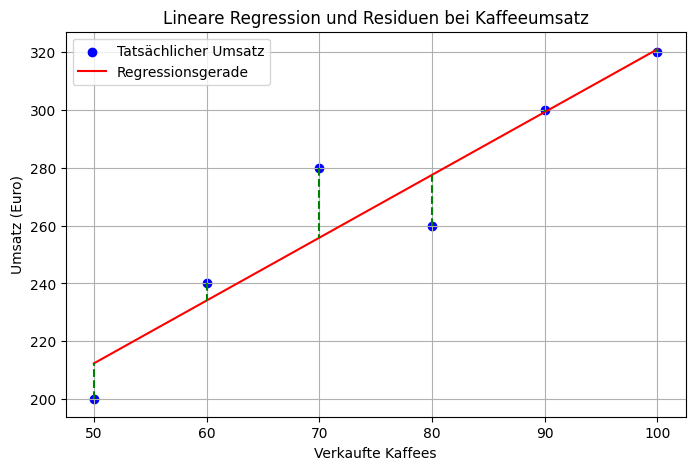

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Datenpunkte für Kaffees und Umsatz
kaffees = np.array([50, 60, 70, 80, 90, 100])
umsatz = np.array([200, 240, 280, 260, 300, 320])  # in Euro

# Lineare Regression anwenden
slope, intercept = np.polyfit(kaffees, umsatz, 1)
regression_line = slope * kaffees + intercept

# Plot erstellen
plt.figure(figsize=(8, 5))
plt.scatter(kaffees, umsatz, color='blue', label='Tatsächlicher Umsatz')
plt.plot(kaffees, regression_line, color='red', label='Regressionsgerade')

# Residuen darstellen
for i in range(len(kaffees)):
    plt.plot([kaffees[i], kaffees[i]], [umsatz[i], regression_line[i]], 'g--')

plt.title('Lineare Regression und Residuen bei Kaffeeumsatz')
plt.xlabel('Verkaufte Kaffees')
plt.ylabel('Umsatz (Euro)')
plt.legend()
plt.grid(True)
plt.show()


Die grünen gestrichelten Linien zeigen die Residuen, also die vertikalen Abstände zwischen den tatsächlichen Umsätzen und den durch die Regressionsgerade vorhergesagten Werten.

Die Anpassung der Regressionsgeraden erfolgt durch die Minimierung des RSS, was bedeutet, dass die Summe der Quadrate dieser Abstände so klein wie möglich gehalten wird. In diesem Beispiel sehen wir, dass die Gerade nicht alle Datenpunkte perfekt durchläuft, was üblich ist, besonders wenn die Daten natürlichen Schwankungen unterliegen oder andere unkontrollierte Variablen vorhanden sind.

### 3.1.2 Geraden aus zwei Datensetzen

Sollen Modelle mit unterschiedlicher Anzahl von Trainingsdatenpunkte verglichen werden, so verwendet man häufig eine normalisierte Variante der RSS, den mittleren quadratischen Fehler (Mean Squared Error, MSE) definiert als:

$MSE(w) = \frac{1}{2}RSS(w)$


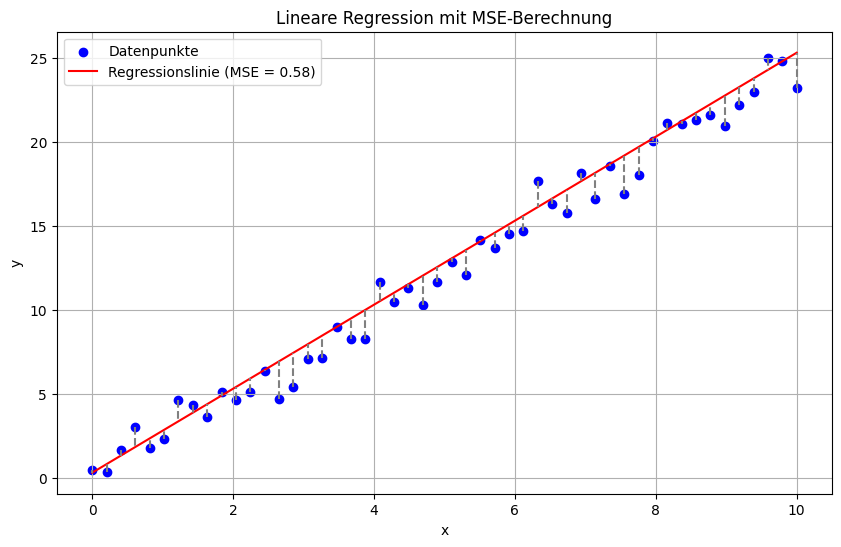

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generiere einige synthetische Datenpunkte
np.random.seed(42)
x = np.linspace(0, 10, 50)
y = 2.5 * x + np.random.normal(size=x.size)

# Füge den tatsächlichen Regressionsmodell hinzu
m = 2.5
b = np.random.normal()

# Berechne Vorhersagen
y_pred = m * x + b

# Berechne den mittleren quadratischen Fehler (MSE)
mse = np.mean((y - y_pred) ** 2) / 2

# Visualisiere die Daten und die Regressionslinie
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Datenpunkte')
plt.plot(x, y_pred, color='red', label=f'Regressionslinie (MSE = {mse:.2f})')

# Zeichne Linien zwischen den tatsächlichen Datenpunkten und den Vorhersagen
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], color='gray', linestyle='--')

plt.title('Lineare Regression mit MSE-Berechnung')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Die grauen gestrichelten Linien zeigen die Abstände zwischen den tatsächlichen Datenpunkten und den Vorhersagewerten auf der Regressionslinie. Diese Abstände sind die Residuen, also die Fehler in den Vorhersagen.


Der mittlere quadratische Fehler $(MSE)$ für dieses Modell beträgt etwa $\frac{1}{2}RSS$, was in diesem Fall etwa $MSE=0.94$ ist.

Dieser Wert gibt ein Maß dafür, wie gut die Regressionslinie die Datenpunkte repräsentiert: je kleiner der MSE, desto besser die Anpassung.

Im Folgenden jedoch wollen wir der Einfachheit halber den Fehler:

$E(w) = \frac{1}{2}\sum_{i=1}^{n}  (y^{(i)} − f_w(x^{(i)})^2$

zu minimieren, um die beste Funktion $f_w$ zu finden.

Das Minimum einer Funktion finden wir normalerweise durch:
1. Ableiten der Funktion
2. Setzen der Ableitung auf Null
3. Lösen des entstandenen Gleichungssystems
4. Untersuchung der gefundenen Lösungen (Hochpunkt, Tiefpunkt, Sattelpunkt, etc.)

Wir Erhalten nach diesem Prozess:  $(\frac{∂E(w)}{∂w_0},\frac{∂E(w)}{∂w_0}) = 0$

also ein lineares Gleichungssystem mit zwei Gleichungen und zwei Unbekannten $(w_0 , w_1 )$, welches prinzipiell eindeutig lösbar ist. Im Bereich des maschinellen Lernens kann es uns jedoch schnell passieren, dass die entstehenden Gleichungssysteme sehr groÿ oder nicht eindeutig lösbar werden. Daher werden meist iterative Verfahren, wie das Gradientenabstiegsverfahren verwendet.

### 3.1.3 Gradientenabstiegsverfahren
Das Gradientenabstiegsverfahren ist eine Ausprägung von
Liniensuchverfahren, bei denen eine Funktion $f : R^d → R$ entlang
eines Richtungsvektors (in diesem Fall dem Gradienten) optimiert
wird. Der Hyperparameter $η ∈ R_{>0}$ im Gradientenabstiegsverfahren
wird auch Lernrate genannt. Er hat direkten Einfluss auf die Geschwindigkeit, in der sich das Verfahren dem Minimum / der Konvergenz nähert. Üblicherweise beobachtet man den zu minimierenden Fehler $E(w)$ während der Laufzeit, um die Anzahl der Iterationen zu bestimmen.

Ist die Lernrate η zu groß, kann es zu Oszillationen kommen und das Verfahren konvergiert nicht.

### Beispiel
Das Gradientenabstiegsverfahren (Gradient Descent) ist eine Optimierungstechnik, die verwendet wird, um das Minimum einer Funktion zu finden. In der maschinellen Lerntheorie ist es besonders nützlich, um die Kostenfunktion zu minimieren, welche die Diskrepanz zwischen den Modellvorhersagen und den tatsächlichen Daten misst. Im Fall von linearen Regressionsmodellen ist die Kostenfunktion oft die Summe der quadratischen Fehler (SSE) oder der mittlere quadratische Fehler (MSE).

#### Wozu dient das Gradientenabstiegsverfahren?
Minimierung der Kostenfunktion: Der Gradientenabstieg wird verwendet, um die Parameter eines Modells (z.B. die Gewichte in der linearen Regression) so anzupassen, dass die Kostenfunktion minimiert wird. Dies führt zu einem Modell, das die Trainingsdaten bestmöglich abbildet.
Anpassung von Modellparametern: Durch iterative Anpassung der Modellparameter in die entgegengesetzte Richtung des Gradienten der Kostenfunktion (daher der Name "Abstieg") können präzisere Vorhersagen erreicht werden.
#### Funktionsweise des Gradientenabstiegs
Beim Gradientenabstieg wird der Gradient der Kostenfunktion bezüglich der Modellparameter (z.B. Steigung und y-Achsenabschnitt in der linearen Regression) berechnet. Der Gradient gibt die Richtung des steilsten Anstiegs der Funktion an. Um das Minimum zu finden, bewegt man sich in die entgegengesetzte Richtung des Gradienten:

$θ_{neu} = θ_{alt} - α $

#### Lineare Regression mit Gradientenabstieg
Wir erstellen nun ein einfaches Beispiel, um das Gradientenabstiegsverfahren in der linearen Regression zu demonstrieren. Dabei verwenden wir synthetische Daten, führen den Gradientenabstieg durch und visualisieren die schrittweise Anpassung der Regressionslinie.

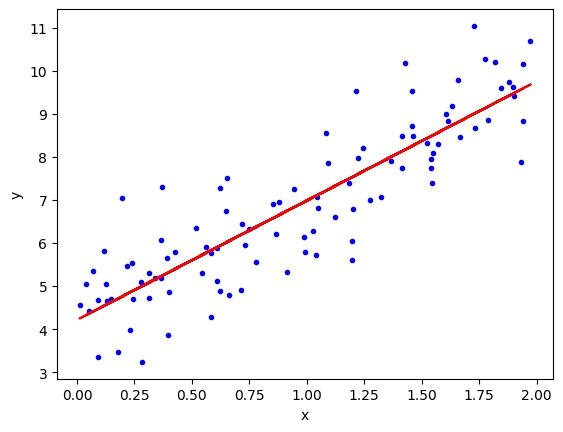

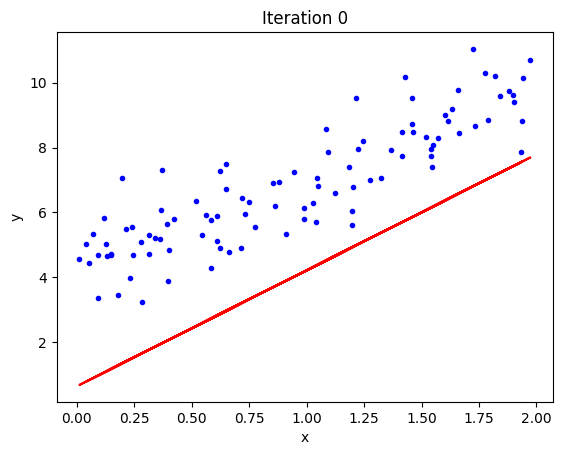

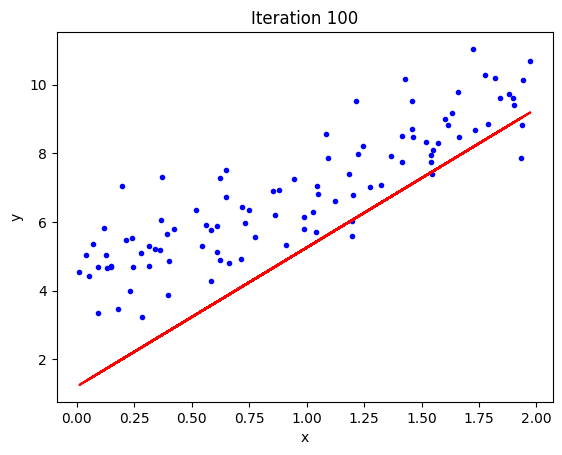

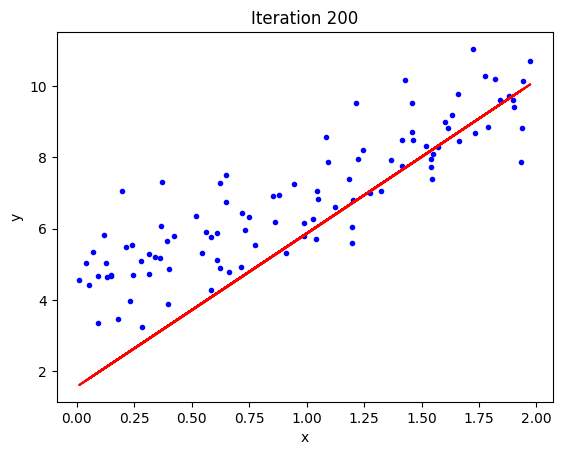

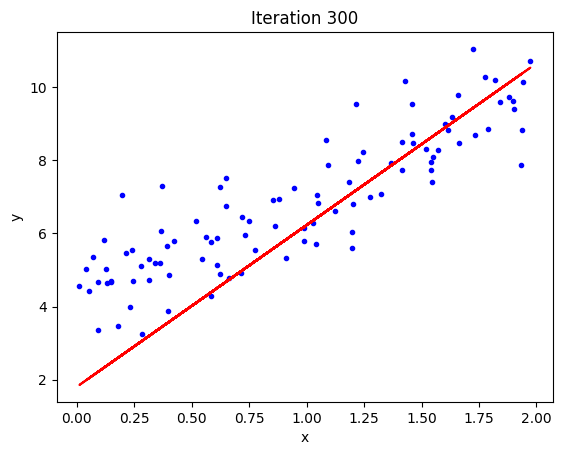

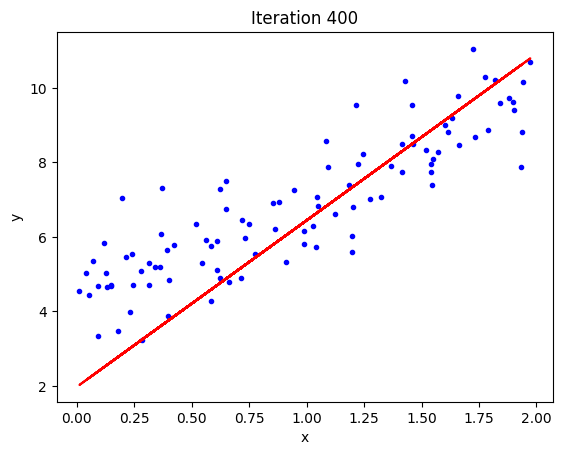

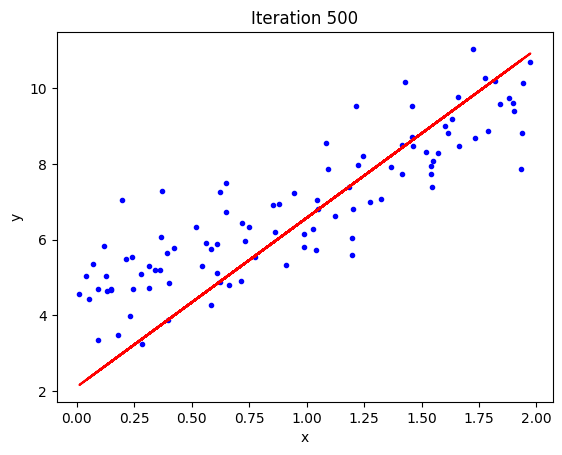

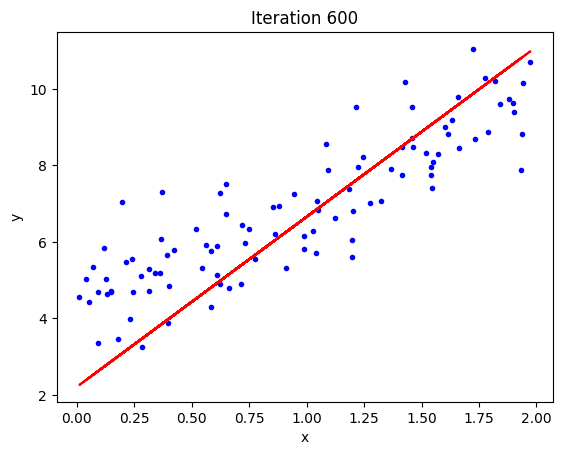

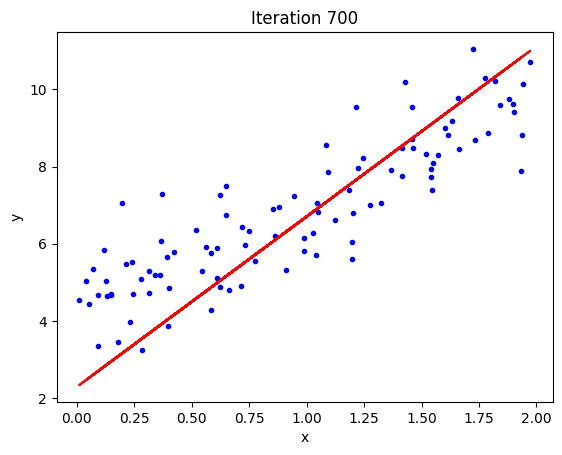

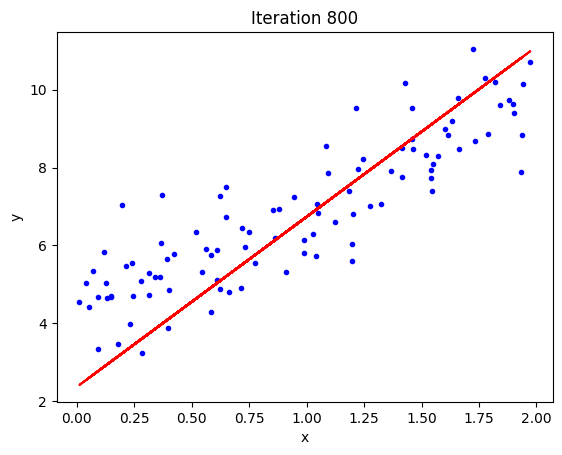

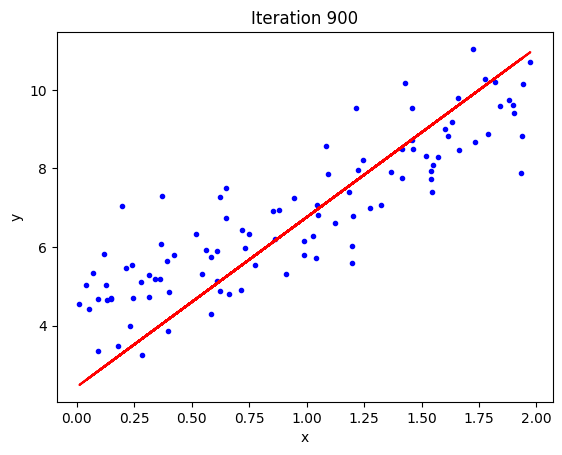

Final parameters: [[2.44075911]
 [4.31730396]]


In [3]:

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add x0 = 1 to each instance (for the intercept term)
X_b = np.c_[np.ones((100, 1)), X]

# Parameters
learning_rate = 0.1
n_iterations = 1000
m = 100

# Initialize theta (model parameters) randomly
theta = np.random.randn(2, 1)

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients

# Function to plot the data and the current regression line
def plot_data_with_line(theta, iteration=None):
    plt.plot(X, y, "b.")
    plt.plot(X, X_b.dot(theta), "r-")
    if iteration is not None:
        plt.title(f"Iteration {iteration}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Visualize the final result
plot_data_with_line(theta)

# Visualization of the regression line at different iterations
theta = np.random.randn(2, 1)  # reinitialize theta

# Plot every 100 iterations
for iteration in range(0, n_iterations, 100):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
    plot_data_with_line(theta, iteration)

print(f"Final parameters: {theta}")


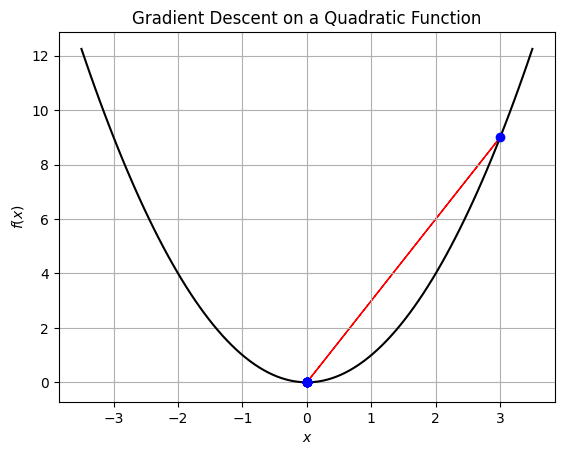

In [10]:

import numpy as np
import matplotlib.pyplot as plt

# Quadratic function and its gradient
def f(x):
    return x**2

def f_grad(x):
    return 2 * x

# Gradient Descent parameters
learning_rate = 0.5
n_iterations = 10
start_point = 3

# Perform Gradient Descent
x = start_point
points = [x]

for i in range(n_iterations):
    gradient = f_grad(x)
    x = x - learning_rate * gradient
    points.append(x)

# Prepare points for plotting arrows
points = np.array(points)
x_vals = np.linspace(-3.5, 3.5, 100)
y_vals = f(x_vals)

# Plot the quadratic function
plt.plot(x_vals, y_vals, 'k-')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Gradient Descent on a Quadratic Function')

# Plot the gradient descent steps with arrows
for i in range(len(points) - 1):
    plt.arrow(points[i], f(points[i]), 
              points[i + 1] - points[i], f(points[i + 1]) - f(points[i]), 
              head_width=0.1, head_length=0.1, fc='red', ec='red')

# Plot the points
plt.plot(points, f(points), 'bo')

plt.grid(True)
plt.show()



## MEHRDIMENSIONALE LINEARE REGRESSION


## Mehrdimensionale Lineare Regression


## Mehrdimensionale Lineare Regression

Die mehrdimensionale lineare Regression ist eine statistische Methode, die verwendet wird, um eine Beziehung zwischen einer abhängigen Variable (Zielvariable) und zwei oder mehr unabhängigen Variablen (Prädiktoren) zu modellieren. Das Ziel ist es, einen linearen Zusammenhang zu identifizieren und Vorhersagen über neue Daten zu machen.

### Funktionsweise

Die Grundformel der mehrdimensionalen linearen Regression lautet:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_nx_n + \epsilon
$$

- $ y $ ist die abhängige Variable.
- $ x_1, x_2, \ldots, x_n $ sind die unabhängigen Variablen.
- $( \beta_0, \beta_1, \beta_2, \ldots, \beta_n )$ sind die Regressionskoeffizienten, die den Einfluss jeder unabhängigen Variable auf die abhängige Variable angeben.
- $ \epsilon $ repräsentiert den Fehlerterm, der die Abweichungen von der Regressionslinie erfasst.

### Schätzung der Koeffizienten

Die Koeffizienten werden üblicherweise mittels der Methode der kleinsten Quadrate geschätzt. Das Ziel ist es, die Summe der quadrierten Residuen zu minimieren:

$$
\text{minimize} \quad S = \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_n x_{in}))^2
$$

### Gradientenabstiegsverfahren

Ein gängiges Verfahren zur Minimierung der Fehlerfunktion in der mehrdimensionalen linearen Regression ist der Gradientenabstieg. Der Gradientenabstieg aktualisiert die Koeffizienten iterativ, um die Summe der quadrierten Residuen zu minimieren.

Die Fehlerfunktion $ E(\mathbf{w}) $ lautet:

$$
E(\mathbf{w}) = \frac{1}{2} \sum_{i=1}^{m} (y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)})^2
$$

wobei:
- $ \mathbf{w} = [\beta_0, \beta_1, \ldots, \beta_n]^T $ die Koeffizienten sind.
- $ \mathbf{x}^{(i)} = [1, x_{i1}, x_{i2}, \ldots, x_{in}]^T $ die Merkmalsvektoren der Datenpunkte sind.

Die Aktualisierungsregel für den Gradientenabstieg lautet:

$$
\mathbf{w} := \mathbf{w} - \alpha \nabla E(\mathbf{w})
$$

wobei:
- $ \alpha $ die Lernrate ist.
- $ \nabla E(\mathbf{w}) $ der Gradient der Fehlerfunktion ist.

Der Gradient der Fehlerfunktion ist gegeben durch:

$$
\nabla E(\mathbf{w}) = -\sum_{i=1}^{m} (y^{(i)} - \mathbf{w}^T \mathbf{x}^{(i)}) \mathbf{x}^{(i)}
$$

Durch iterative Aktualisierungen der Koeffizienten in Richtung des negativen Gradienten der Fehlerfunktion wird die Fehlerfunktion minimiert, und die Koeffizienten konvergieren zu den optimalen Werten.

### Anwendungsbereiche

- **Wirtschaftswissenschaften**: Vorhersage von Verkaufszahlen basierend auf Werbeausgaben und Markttrends.
- **Gesundheitswesen**: Analyse des Einflusses von Lebensstilfaktoren auf die Gesundheit.
- **Umweltwissenschaften**: Modellierung der Auswirkungen von Umweltfaktoren auf Ökosysteme.
- **Ingenieurwesen**: Vorhersage der Belastbarkeit von Materialien unter verschiedenen Bedingungen.

### Vorteile

- Ermöglicht die Bewertung der Stärke des Einflusses verschiedener unabhängiger Variablen auf eine abhängige Variable.
- Kann mit vielen Datenpunkten umgehen und bietet eine klare Interpretierbarkeit der Modellparameter.

Durch die Anwendung der mehrdimensionalen linearen Regression können wir komplexe Zusammenhänge zwischen verschiedenen Variablen erkennen und fundierte Vorhersagen und Entscheidungen treffen.





### Gradientenabstiegverfahren im 3D Raum


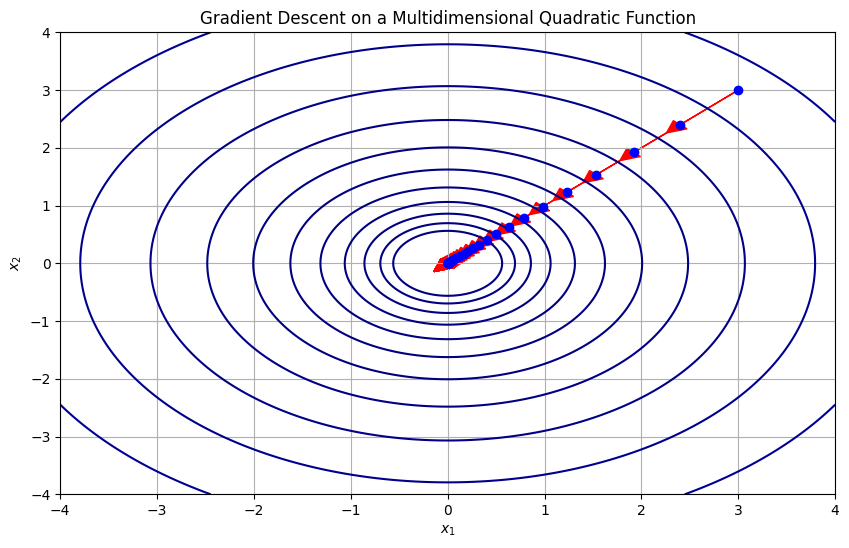

In [11]:

# Multidimensional quadratic function and its gradient
def f(x1, x2):
    return x1**2 + x2**2

def f_grad(x1, x2):
    return np.array([2 * x1, 2 * x2])

# Gradient Descent parameters
learning_rate = 0.1
n_iterations = 50
start_point = np.array([3, 3])

# Perform Gradient Descent
x = start_point
points = [x]

for i in range(n_iterations):
    gradient = f_grad(x[0], x[1])
    x = x - learning_rate * gradient
    points.append(x)

# Prepare points for plotting arrows
points = np.array(points)

# Generate grid for contour plot
x1_vals = np.linspace(-4, 4, 400)
x2_vals = np.linspace(-4, 4, 400)
x1, x2 = np.meshgrid(x1_vals, x2_vals)
z = f(x1, x2)

# Plot the contour of the function
plt.figure(figsize=(10, 6))
plt.contour(x1, x2, z, levels=np.logspace(-0.5, 3, 20), cmap='jet')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Gradient Descent on a Multidimensional Quadratic Function')

# Plot the gradient descent steps with arrows
for i in range(len(points) - 1):
    plt.arrow(points[i][0], points[i][1], 
              points[i + 1][0] - points[i][0], points[i + 1][1] - points[i][1], 
              head_width=0.2, head_length=0.2, fc='red', ec='red')

# Plot the points
plt.plot(points[:, 0], points[:, 1], 'bo')

plt.grid(True)
plt.show()


## Genauigkeit der Linearen Regression

Die Genauigkeit eines linearen Regressionsmodells kann durch verschiedene Metriken bewertet werden. Zu den wichtigsten Metriken gehören die Residual Sum of Squares (RSS), Mean Squared Error (MSE) und Total Sum of Squares (TSS), die zusammen den Bestimmtheitsmaß ($R^2$) ergeben.

### Residual Sum of Squares (RSS)

Die Residual Sum of Squares (RSS) misst die Summe der quadrierten Abweichungen der tatsächlichen Werte von den vorhergesagten Werten:

$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Dabei ist $y_i$ der tatsächliche Wert und $\hat{y}_i$ der vorhergesagte Wert. Ein kleinerer RSS-Wert deutet auf eine bessere Anpassung des Modells hin.

### Mean Squared Error (MSE)

Der Mean Squared Error (MSE) ist der durchschnittliche quadratische Fehler und wird wie folgt berechnet:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Der MSE gibt ein Maß für die durchschnittliche Größe der Fehlerquadrate. Ein kleinerer MSE-Wert zeigt eine bessere Modellanpassung.

### Total Sum of Squares (TSS)

Die Total Sum of Squares (TSS) misst die Gesamtvariation der tatsächlichen Werte um ihren Mittelwert:

$$
TSS = \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

Dabei ist $\bar{y}$ der Mittelwert der tatsächlichen Werte. TSS gibt an, wie stark die Datenpunkte um den Mittelwert variieren.

### Bestimmtheitsmaß ($R^2$)

Das Bestimmtheitsmaß ($R^2$) gibt an, welcher Anteil der Gesamtvariation der abhängigen Variable durch das Modell erklärt wird. Es wird wie folgt berechnet:

$$
R^2 = 1 - \frac{RSS}{TSS}
$$

Ein $R^2$-Wert von 1 bedeutet, dass das Modell die gesamte Variation der abhängigen Variable erklärt, während ein Wert von 0 bedeutet, dass das Modell keine Erklärungskraft hat. Typischerweise liegt $R^2$ zwischen 0 und 1, wobei höhere Werte eine bessere Anpassung des Modells anzeigen.

Durch die Kombination dieser Metriken können wir die Genauigkeit und die Güte der Anpassung eines linearen Regressionsmodells bewerten.


### Interpretierbarkeit

Modelle basierend auf linearer Regression besitzen den großen Vorteil, dass die Parameter $\mathbf{w}$ vom Menschen interpretierbar sind. Dies erleichtert unter anderem die Sicherstellung der Korrektheit. Die Koeffizienten $\beta_0, \beta_1, \ldots, \beta_n$ zeigen direkt die Stärke und Richtung des Einflusses jeder unabhängigen Variable auf die abhängige Variable. Die Interpretationen der Koeffizienten sind wie folgt:

- **$w_i > 0$**: Positiver Zusammenhang. Wenn $x_i$ um $m$ steigt, steigt $y$ um $m \cdot |w_i|$, vorausgesetzt, die anderen Einflussgrößen bleiben gleich.
- **$w_i \approx 0$**: (Fast) kein (linearer) Zusammenhang zwischen $x_i$ und $y$.
- **$w_i < 0$**: Negativer Zusammenhang. Wenn $x_i$ um $m$ steigt, sinkt $y$ um $m \cdot |w_i|$, vorausgesetzt, die anderen Einflussgrößen bleiben gleich.

Ein wesentlicher Vorteil der linearen Regression ist somit ihre einfache Interpretierbarkeit:
- **Koeffizienten**: Die Regressionskoeffizienten zeigen direkt die Stärke und Richtung des Einflusses jeder unabhängigen Variable auf die abhängige Variable.
- **Einfachheit**: Lineare Modelle sind einfach zu verstehen und zu erklären, was sie besonders nützlich macht, wenn Transparenz und Interpretierbarkeit wichtig sind, wie in den Bereichen Medizin und Sozialwissenschaften.
- **Vorhersagbarkeit**: Obwohl einfache, lineare Modelle manchmal weniger genau sind als komplexere Modelle, bieten sie robuste Vorhersagen und eine klare Vorstellung davon, wie Änderungen in den Prädiktoren die Zielvariable beeinflussen.

Durch die Kombination dieser Metriken und der leichten Interpretierbarkeit können wir die Genauigkeit und die Güte der Anpassung eines linearen Regressionsmodells bewerten und gleichzeitig die Einflussfaktoren klar und verständlich darstellen.

## Erweiterung der Linearen Regression für Nichtlineare Zusammenhänge

Die mehrdimensionale lineare Regression kann durch einen Trick auch verwendet werden, um nichtlineare Zusammenhänge zu modellieren. Dies wird durch die Anwendung einer Basiswechsel-Funktion $\phi : \mathbb{R} \to \mathbb{R}^d$ ermöglicht.

### Nichtlineare Zusammenhänge lernen

Lineare Regression ist ursprünglich darauf ausgelegt, lineare Beziehungen zwischen den unabhängigen Variablen und der Zielvariable zu modellieren. Um jedoch auch nichtlineare Zusammenhänge zu erfassen, können wir die ursprünglichen Merkmale transformieren und somit einen Basiswechsel vollziehen.

### Basiswechsel mit $\phi$

Eine Funktion $\phi$ transformiert die ursprünglichen Merkmale in eine höherdimensionale Merkmalsraum, in dem nichtlineare Beziehungen als lineare Beziehungen dargestellt werden können. Die transformierten Merkmale werden dann in der linearen Regression verwendet.

Sei $x$ eine ursprüngliche Variable, dann könnte $\phi(x)$ beispielsweise wie folgt definiert sein:

$$
\phi(x) = \begin{pmatrix} 
x \\ 
x^2 \\ 
x^3 \\
\vdots \\ 
x^d 
\end{pmatrix}
$$

### Anwendungsbeispiel

Wenn wir beispielsweise die Funktion $\phi(x) = [1, x, x^2]^T$ verwenden, dann können wir ein quadratisches Modell fitten, das in der ursprünglichen linearen Regression so aussehen würde:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon
$$

### Vorgehensweise

1. **Feature-Transformation**: Wenden Sie die Basiswechsel-Funktion $\phi$ auf die ursprünglichen Merkmale an, um neue Merkmale zu erzeugen.
2. **Lineare Regression**: Wenden Sie die lineare Regression auf die transformierten Merkmale an, um die Regressionskoeffizienten zu schätzen.
3. **Vorhersage**: Verwenden Sie das transformierte Modell, um Vorhersagen zu treffen.

### Vorteile

- **Flexibilität**: Durch die Wahl geeigneter Funktionen $\phi$ können verschiedene nichtlineare Zusammenhänge modelliert werden.
- **Einfache Implementierung**: Die Erweiterung nutzt die bestehende lineare Regression und ist daher einfach umzusetzen.
- **Interpretierbarkeit**: Die resultierenden Modelle bleiben interpretierbar, insbesondere wenn die Transformationen bekannt und verständlich sind.

Durch diese Methode können wir die Stärke der linearen Regression nutzen, um auch komplexere, nichtlineare Beziehungen in den Daten zu erfassen.

### Prinzipiell hätten wir nun mit
- der mehrdimensionalen linearen Regression
- dem Basiswechseltrick 
- dem Gradientenabstiegsverfahren
alle nötigen Werkzeuge um ein Polynom n-ten Grades perfekt an unsere $n$ Datenpunkte D zu fitten. Aber ist das immer eine gute Idee?

## Overfitting in der Linearen Regression

### Was ist Overfitting?

Overfitting tritt auf, wenn ein Modell zu gut an die Trainingsdaten angepasst ist, sodass es auch die Rauschelemente und Ausreißer in den Daten erfasst. Ein überangepasstes Modell hat in der Regel eine sehr hohe Komplexität und eine exzellente Leistung auf den Trainingsdaten, versagt jedoch bei der Verallgemeinerung auf neue, unbekannte Daten (Testdaten).

### Visualisierung von Overfitting

#### 1. Unteranpassung (Underfitting)

Bei der Unteranpassung ist das Modell zu einfach, um die zugrunde liegenden Muster in den Daten zu erfassen. Es hat sowohl auf den Trainings- als auch auf den Testdaten eine schlechte Leistung.

Gewichte $w ≈ (−296, 37.8)T$



#### 2. Gutes Fitten (Good Fit)

Ein gut angepasstes Modell erfasst die zugrunde liegenden Muster in den Daten ohne die Rauschelemente. Es generalisiert gut und hat sowohl auf den Trainings- als auch auf den Testdaten eine gute Leistung.

$w ≈ (237, −15.3, 1.24)T$

#### 3. Überanpassung (Overfitting)

Bei der Überanpassung passt das Modell zu genau an die Trainingsdaten, einschließlich des Rauschens und der Ausreißer. Es hat eine sehr gute Leistung auf den Trainingsdaten, aber eine schlechte Leistung auf den Testdaten.

Gewichte $w =(0, −0.0000457, −0.00000496, −0.0000570, −0.000489, −0.00297, −0.00977, 0.00256, −0.000271, 0.0000152, −0.000000471, 0.00000000777, −0.0000000000530)T$



### Erkennung von Overfitting

1. **Trainings- vs. Testfehler**: Ein großer Unterschied zwischen dem Fehler auf den Trainingsdaten und dem Fehler auf den Testdaten ist ein Hinweis auf Overfitting.
2. **Validierungskurven**: Plots von Trainings- und Validierungsfehlern in Abhängigkeit von der Modellkomplexität können zeigen, ob ein Modell überangepasst ist.

### Maßnahmen gegen Overfitting

1. **Regularisierung**: Einführung von Regularisierungstechniken wie Lasso (L1-Regularisierung) und Ridge (L2-Regularisierung), um die Komplexität des Modells zu begrenzen.
2. **Cross-Validation**: Verwendung von Kreuzvalidierungstechniken zur robusteren Bewertung der Modellleistung.
3. **Datenaugmentation**: Erweiterung des Datensatzes durch Generierung zusätzlicher Datenpunkte.
4. **Merkmalsselektion**: Auswahl der wichtigsten Merkmale zur Vermeidung unnötiger Komplexität.
5. **Frühes Stoppen**: Beim Training von iterativen Modellen kann das frühe Stoppen des Trainings helfen, Overfitting zu vermeiden.

### Zusammenfassung

Overfitting ist ein häufiges Problem in der maschinellen Lernpraxis, das zu schlechter Generalisierungsleistung führt. Durch den Einsatz von Techniken wie Regularisierung und Cross-Validation kann Overfitting effektiv bekämpft werden, um Modelle zu entwickeln, die sowohl auf Trainings- als auch auf Testdaten gut abschneiden.

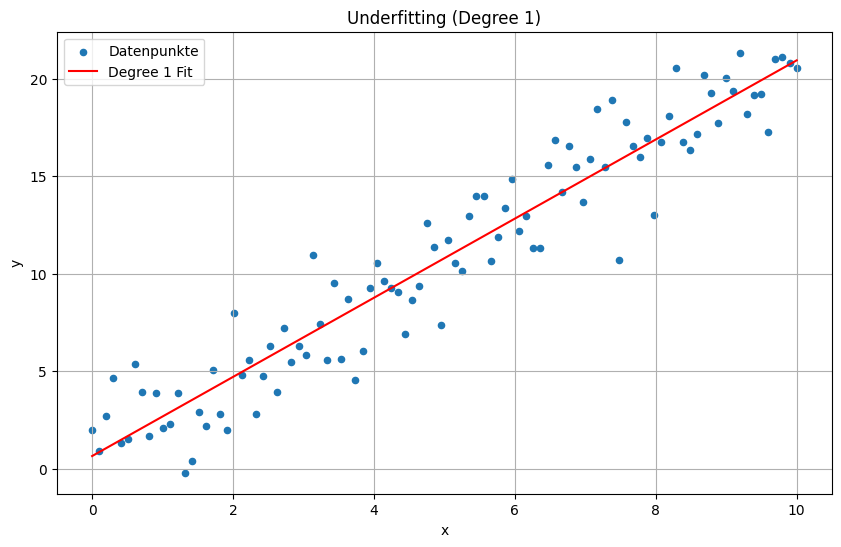

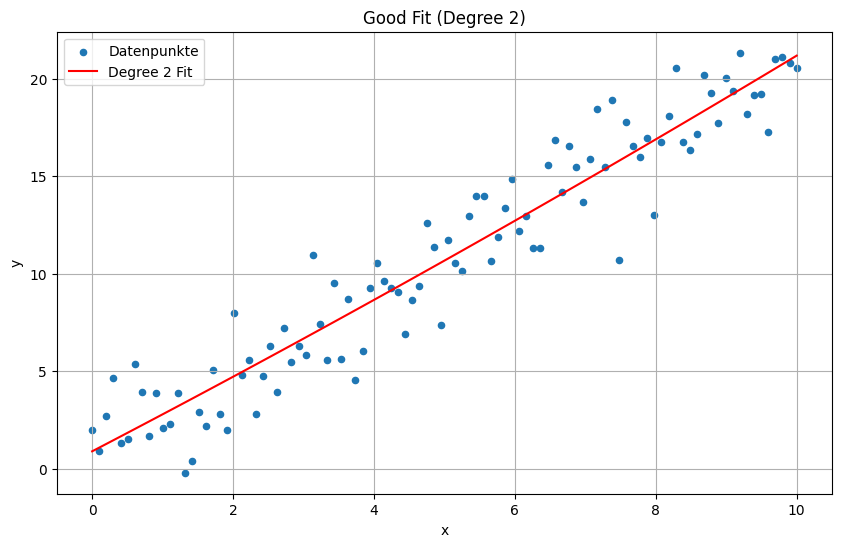

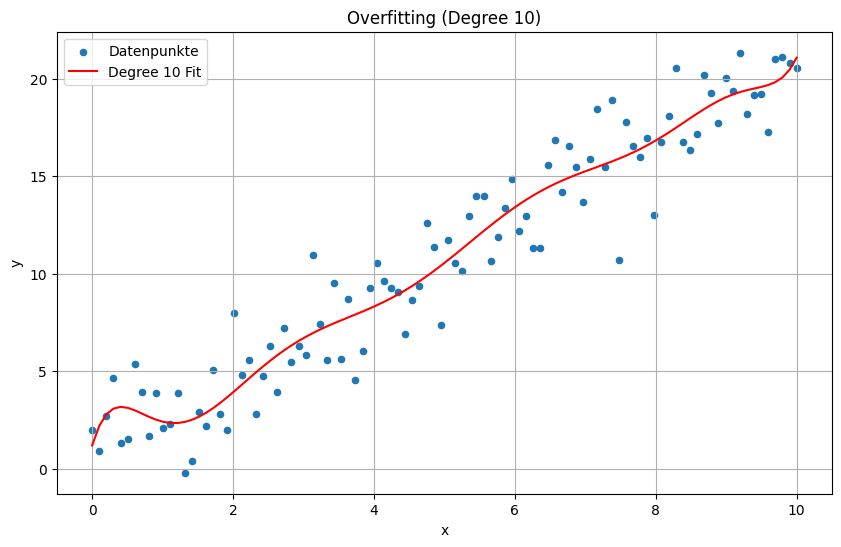

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generieren von synthetischen Daten
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.randn(100) * 2

# Daten für die Visualisierung aufbereiten
X = X[:, np.newaxis]

# Funktionen zum Plotten der verschiedenen Fits
def plot_model(X, y, degree, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, s=20, label='Datenpunkte')
    
    # Polynomial Regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Plotten der Vorhersagekurve
    plt.plot(X, y_pred, color='red', label=f'Degree {degree} Fit')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Underfitting
plot_model(X, y, degree=1, title='Underfitting (Degree 1)')

# Good Fit
plot_model(X, y, degree=2, title='Good Fit (Degree 2)')

# Overfitting
plot_model(X, y, degree=10, title='Overfitting (Degree 10)')



## Hyperparameter in der Linearen Regression auf Polynomen mit Gradient Descent

Hyperparameter sind Einstellungen, die vor dem Training des Modells festgelegt werden und nicht aus den Trainingsdaten gelernt werden. In der linearen Regression auf Polynomen mit Hilfe des Gradientenabstiegsverfahrens gibt es normalerweise drei wichtige Hyperparameter:

### Lernrate (η)

- **Definition**: Die Lernrate (oft als $\eta$ bezeichnet) bestimmt die Schrittweite, mit der die Gewichte bei jedem Schritt des Gradientenabstiegsverfahrens aktualisiert werden.
- **Funktion**: Eine zu hohe Lernrate kann dazu führen, dass das Modell die optimale Lösung überspringt, während eine zu niedrige Lernrate dazu führt, dass das Training sehr langsam konvergiert oder in lokalen Minima stecken bleibt.
- **Einfluss auf Modellkomplexität**: Eine gut gewählte Lernrate hilft dabei, die Modellkomplexität zu kontrollieren, indem sie sicherstellt, dass das Modell effizient lernt, ohne übermäßig anzupassen oder zu unteranpassen.

### Anzahl der Lernschritte

- **Definition**: Die Anzahl der Lernschritte (Iterationsanzahl) gibt an, wie oft das Modell die Gewichte während des Trainings aktualisiert.
- **Funktion**: Je mehr Schritte, desto länger trainiert das Modell und desto näher kommt es an die optimale Lösung.
- **Einfluss auf Modellkomplexität**: Eine zu hohe Anzahl von Lernschritten kann zu Überanpassung führen, da das Modell das Rauschen in den Trainingsdaten lernt. Eine zu niedrige Anzahl von Lernschritten kann zu Unteranpassung führen, da das Modell nicht genug Zeit hat, um die zugrunde liegenden Muster zu lernen.

### Polynomgrad

- **Definition**: Der Polynomgrad gibt den Grad des Polynoms an, das zur Modellierung der Beziehung zwischen den unabhängigen Variablen und der Zielvariablen verwendet wird.
- **Funktion**: Ein höherer Polynomgrad ermöglicht es dem Modell, komplexere Zusammenhänge in den Daten zu erfassen.
- **Einfluss auf Modellkomplexität**: Ein zu hoher Polynomgrad führt zu Überanpassung, da das Modell zu komplex wird und das Rauschen in den Daten lernt. Ein zu niedriger Polynomgrad führt zu Unteranpassung, da das Modell zu einfach ist, um die zugrunde liegenden Muster in den Daten zu erfassen.

### Zusammenfassung

Hyperparameter sind entscheidend für die Kontrolle der Modellkomplexität und die Vermeidung von Überanpassung und Unteranpassung. Durch sorgfältige Abstimmung dieser Hyperparameter kann ein Modell entwickelt werden, das gut generalisiert und genaue Vorhersagen für neue, unbekannte Daten trifft. Hier ist eine Übersicht der drei Hyperparameter in diesem Kontext:

1. **Lernrate (η)**: Bestimmt die Schrittweite der Gewichtsaktualisierungen. Sollte weder zu hoch noch zu niedrig sein.
2. **Anzahl der Lernschritte**: Bestimmt, wie oft die Gewichte aktualisiert werden. Eine zu hohe Anzahl führt zu Überanpassung, eine zu niedrige Anzahl führt zu Unteranpassung.
3. **Polynomgrad**: Bestimmt die Komplexität des Modells. Ein zu hoher Grad führt zu Überanpassung, ein zu niedriger Grad führt zu Unteranpassung.

## Optimierung von Hyperparametern

### Was ist die Optimierung von Hyperparametern?

Die Optimierung von Hyperparametern ist ein Prozess, bei dem die besten Parameterwerte für ein maschinelles Lernmodell ausgewählt werden. Hyperparameter sind Einstellungen, die vor dem Training des Modells festgelegt werden und nicht aus den Trainingsdaten gelernt werden. Beispiele für Hyperparameter in der polynomiellen Regression mit Gradientenabstieg sind die Lernrate (η), der Polynomgrad und die Anzahl der Lernschritte.

### Warum ist die Optimierung von Hyperparametern wichtig?

Die Wahl der richtigen Hyperparameter hat einen erheblichen Einfluss auf die Leistung des Modells. Gut gewählte Hyperparameter können die Genauigkeit verbessern und sowohl Überanpassung (Overfitting) als auch Unteranpassung (Underfitting) vermeiden. Eine effektive Optimierung der Hyperparameter führt zu Modellen, die besser generalisieren und genauere Vorhersagen auf neuen Daten liefern.

### Wie funktioniert die Optimierung von Hyperparametern?

Eine gängige Methode zur Optimierung von Hyperparametern ist die Rastersuche (Grid Search). Dabei wird ein Gitter (Grid) von möglichen Werten für die Hyperparameter definiert. Das Modell wird für jede Kombination von Hyperparametern im Gitter trainiert und bewertet. Die Kombination mit der besten Leistung (z.B. dem niedrigsten Fehler) wird ausgewählt.

### Beispiel: Rastersuche

1. **Definieren des Parametergrids**:
   - Erstellen Sie ein Gitter von möglichen Werten für die Hyperparameter. Zum Beispiel können Sie verschiedene Werte für die Lernrate und den Polynomgrad ausprobieren.
   
2. **Training und Validierung**:
   - Trainieren Sie das Modell für jede Kombination von Hyperparametern im Gitter. Verwenden Sie Kreuzvalidierung, um die Leistung jeder Kombination zu bewerten.
   
3. **Auswahl der besten Hyperparameter**:
   - Wählen Sie die Kombination von Hyperparametern, die die beste Leistung auf den Validierungsdaten erzielt hat.

### Vorteile der Rastersuche

- **Systematisch und umfassend**: Grid Search prüft systematisch alle Kombinationen von Hyperparametern im definierten Gitter.
- **Einfach zu implementieren**: Grid Search ist einfach zu verstehen und zu implementieren.
- **Kombination mit Kreuzvalidierung**: Grid Search kann leicht mit Kreuzvalidierung kombiniert werden, um die Robustheit der Hyperparameter-Auswahl zu verbessern.

### Nachteile der Rastersuche

- **Rechenintensiv**: Bei vielen Hyperparametern und großen Gittergrößen kann Grid Search sehr rechenintensiv und zeitaufwändig sein.
- **Begrenzte Flexibilität**: Grid Search sucht nur innerhalb des vordefinierten Gitters und kann optimale Werte übersehen, die zwischen den Gitterpunkten liegen.

Durch die Optimierung der Hyperparameter können Sie die Leistung Ihres Modells erheblich verbessern und sicherstellen, dass es gut auf neuen Daten generalisiert.

Beste Hyperparameter: {'poly_features__degree': 2, 'sgd_reg__eta0': 0.0001}


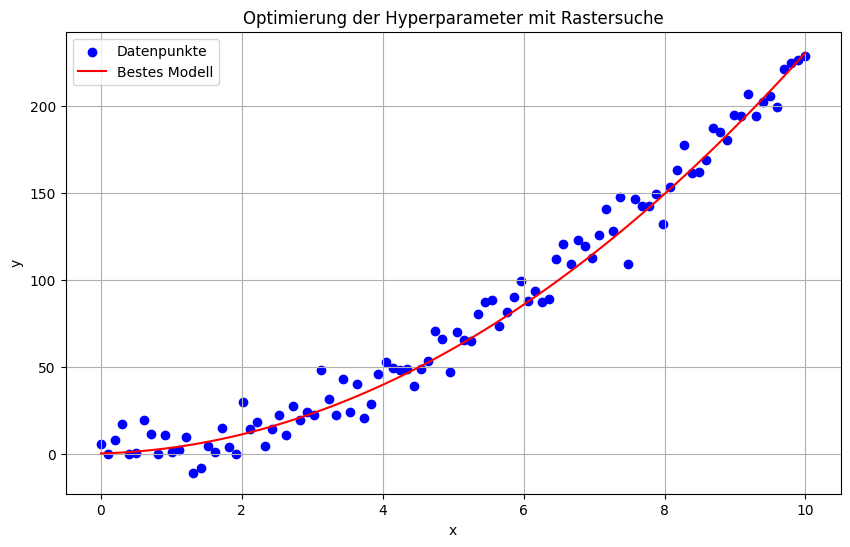

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Generieren von synthetischen Daten
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1) * 10

# Definition der Pipeline
def create_pipeline(degree, eta):
    return Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('sgd_reg', SGDRegressor(max_iter=1000, tol=1e-3, eta0=eta, learning_rate='constant', penalty=None, random_state=42))
    ])

# Parametergrid für die Rastersuche
param_grid = {
    'poly_features__degree': [1, 2, 3, 4],
    'sgd_reg__eta0': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Durchführung der Rastersuche
grid_search = GridSearchCV(create_pipeline(2, 0.1), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y.ravel())

# Beste Hyperparameter
print("Beste Hyperparameter:", grid_search.best_params_)

# Training des besten Modells
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Visualisierung der Daten und des besten Modells
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datenpunkte')
plt.plot(X, y_pred, color='red', label='Bestes Modell')
plt.title("Optimierung der Hyperparameter mit Rastersuche")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Optimierung von Hyperparametern: Datenaufteilung und Validierung


### Datenaufteilung für die Optimierung

Um die Hyperparameter eines Modells zu optimieren, wird die verfügbare Datenmenge in verschiedene Teile unterteilt. Dies geschieht typischerweise in drei Schritte:

1. **Trainingsdaten**: Diese werden verwendet, um die Modellparameter zu bestimmen. Das Modell lernt aus diesen Daten die zugrunde liegenden Muster.

2. **Validierungsdaten**: Diese werden verwendet, um die Hyperparameter zu testen. Sie helfen dabei, die besten Hyperparameter-Kombinationen zu identifizieren, indem sie die Modellleistung auf bisher ungesehenen Daten bewerten.

3. **Testdaten**: Diese werden verwendet, um die endgültige Modellleistung zu bestimmen. Nachdem die besten Hyperparameter gefunden wurden, wird das Modell mit diesen Hyperparametern trainiert und die Leistung auf den Testdaten bewertet, um sicherzustellen, dass es gut auf neuen, unbekannten Daten generalisiert.

### Funktionsweise der Hyperparameter-Optimierung

1. **Datenaufteilung**:
   - Teilen Sie die verfügbaren Daten in Trainings-, Validierungs- und Testdaten auf.
   
2. **Modelltraining**:
   - Verwenden Sie die Trainingsdaten, um die Modellparameter zu schätzen.
   
3. **Hyperparameter-Tuning**:
   - Verwenden Sie die Validierungsdaten, um verschiedene Kombinationen von Hyperparametern zu testen und zu bewerten. Methoden wie Rastersuche (Grid Search) oder Random Search können verwendet werden.
   
4. **Leistungsbewertung**:
   - Nach der Optimierung der Hyperparameter wird das Modell mit den besten Hyperparametern auf den Testdaten evaluiert, um die endgültige Leistung zu bestimmen.

### Beispielcode für die Hyperparameter-Optimierung

Hier ist ein Beispielcode, der zeigt, wie die Daten aufgeteilt und die Hyperparameter optimiert werden können:

### Zusammenfassung

Durch die Aufteilung der Daten in Trainings-, Validierungs- und Testdaten kann die Hyperparameter-Optimierung effektiv durchgeführt werden. Dies stellt sicher, dass die Modellparameter aus den Trainingsdaten gelernt werden, die Hyperparameter auf den Validierungsdaten getestet werden und die endgültige Modellleistung auf den Testdaten bewertet wird. Dieses Vorgehen hilft dabei, Modelle zu entwickeln, die gut generalisieren und genaue Vorhersagen auf neuen, unbekannten Daten liefern.

/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/dino.dervisevic/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_it

Beste Hyperparameter: {'poly_features__degree': 2, 'sgd_reg__eta0': 0.0001}
MSE auf den Testdaten: 74.05124041007574


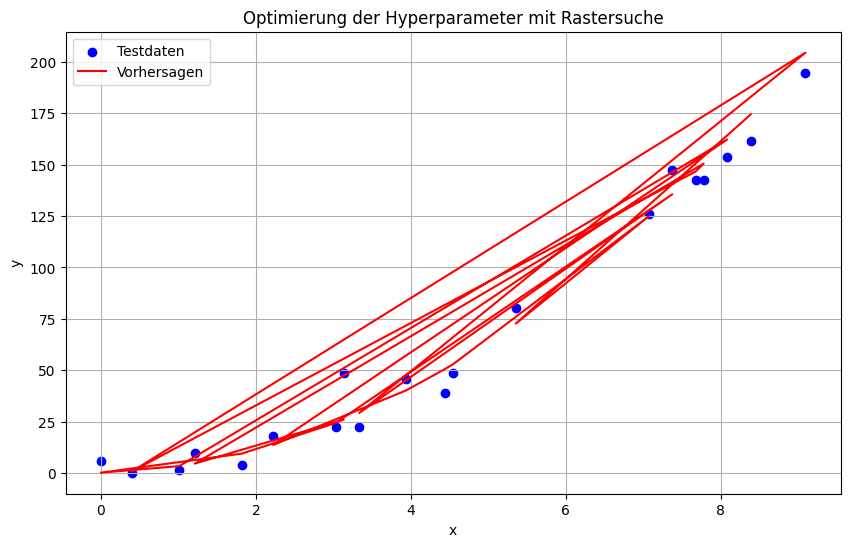

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Generieren von synthetischen Daten
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 1 + np.random.randn(100, 1) * 10

# Datenaufteilung in Trainings-, Validierungs- und Testdaten
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# Definition der Pipeline
def create_pipeline(degree, eta):
    return Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('sgd_reg', SGDRegressor(max_iter=1000, tol=1e-3, eta0=eta, learning_rate='constant', penalty=None, random_state=42))
    ])

# Parametergrid für die Rastersuche
param_grid = {
    'poly_features__degree': [1, 2, 3, 4],
    'sgd_reg__eta0': [0.0001, 0.001, 0.01, 0.1, 1]
}

# Durchführung der Rastersuche
grid_search = GridSearchCV(create_pipeline(2, 0.1), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())

# Beste Hyperparameter
print("Beste Hyperparameter:", grid_search.best_params_)

# Training des besten Modells auf den gesamten Trainingsdaten
best_model = grid_search.best_estimator_
best_model.fit(X_train_full, y_train_full.ravel())

# Leistungsbewertung auf den Testdaten
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE auf den Testdaten:", mse)

# Visualisierung der Daten und des besten Modells
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Testdaten')
plt.plot(X_test, y_pred, color='red', label='Vorhersagen')
plt.title("Optimierung der Hyperparameter mit Rastersuche")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Ridge Regression

### Was ist Ridge Regression?

Ridge Regression, auch bekannt als Tikhonov-Regularisierung, ist eine Methode der linearen Regression, die zur Vermeidung von Überanpassung (Overfitting) verwendet wird. Sie fügt eine Regularisierungsstrafe zur Fehlerfunktion hinzu, um die Größe der Regressionskoeffizienten zu begrenzen.

### Funktionsweise

In der normalen linearen Regression minimieren wir die Summe der quadrierten Fehler (Residual Sum of Squares, RSS):

$$
RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_n x_{in}))^2
$$

Ridge Regression fügt eine Regularisierungsstrafe hinzu, die proportional zur Summe der Quadrate der Regressionskoeffizienten ist. Die neue Fehlerfunktion, die minimiert werden soll, lautet:

$$
RSS_{ridge} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Hierbei ist $\lambda$ ein Hyperparameter, der die Stärke der Regularisierung kontrolliert:
- Wenn $\lambda = 0$, entspricht Ridge Regression der normalen linearen Regression.
- Wenn $\lambda > 0$, normaler Wirkungsbereich, mit wachsendem $\lambda$ werden die Parameter $\beta$ immer weiter eingeschränkt und der effektive Polynomgrad sinkt
- Wenn $\lambda \to \infty$, werden die Koeffizienten stark eingeschränkt und tendieren gegen Null.

### Vorteile

1. **Vermeidung von Überanpassung**: Durch die Begrenzung der Größe der Koeffizienten kann Ridge Regression Überanpassung vermeiden, insbesondere wenn die Anzahl der Prädiktoren groß ist.
2. **Stabilität der Schätzungen**: Ridge Regression kann bei multikollinearen Daten stabilere Schätzungen liefern.

### Nachteile

1. **Bias-Varianz-Abwägung**: Ridge Regression kann die Varianz reduzieren, jedoch auf Kosten einer höheren Verzerrung (Bias).
2. **Interpretierbarkeit**: Die Interpretierbarkeit der Koeffizienten kann durch die Regularisierung erschwert werden, da sie nicht mehr direkt die Beziehung zwischen Prädiktoren und Zielvariablen widerspiegeln.

### Anwendung

Ridge Regression wird in vielen Bereichen verwendet, insbesondere wenn es viele Prädiktoren gibt und das Risiko von multikollinearen Daten hoch ist.

# Zusammenfassung

Ridge Regression ist eine erweiterte Form der linearen Regression, die eine Regularisierungsstrafe hinzufügt, um die Größe der Regressionskoeffizienten zu begrenzen. Dies hilft, Überanpassung zu vermeiden und stabilere Schätzungen zu liefern, insbesondere bei multikollinearen Daten. Durch die Anpassung des Hyperparameters $\lambda$ kann die Stärke der Regularisierung kontrolliert werden, was die Balance zwischen Bias und Varianz beeinflusst.

Mean Squared Error (MSE): 2.4889885131043767


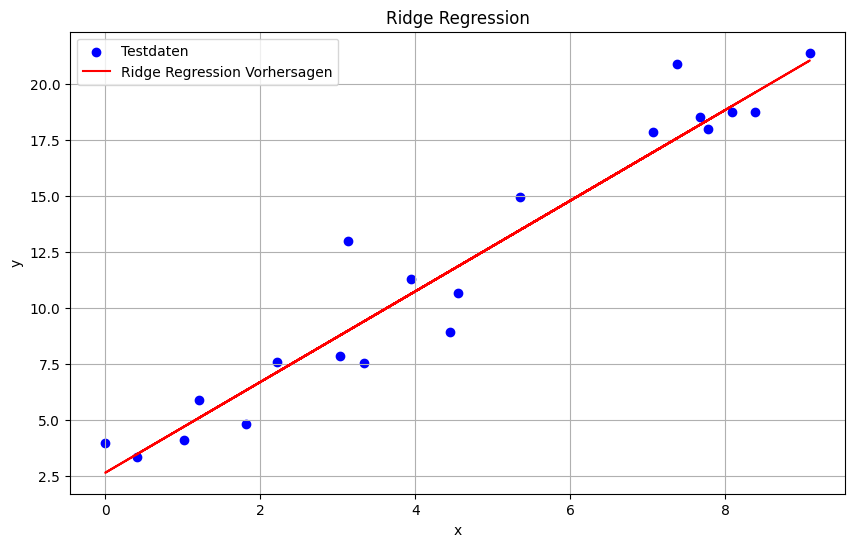

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Generieren von synthetischen Daten
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + 3 + np.random.randn(100, 1) * 2

# Datenaufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression Modell
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Vorhersagen
y_pred = ridge_reg.predict(X_test)

# Berechnung des Fehlers
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Visualisierung der Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Testdaten')
plt.plot(X_test, y_pred, color='red', label='Ridge Regression Vorhersagen')
plt.title("Ridge Regression")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()